In [ ]:
# import packages and data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

with open("hw04_data_set_train.csv") as file1:
  training_set = np.loadtxt(file1, delimiter=",")
with open("hw04_data_set_test.csv") as file2:
  test_set = np.loadtxt(file2, delimiter=",")

In [ ]:
# set plot parameters
x_axis_num = 9
y_axis_num = 7
min_value_x = 0.0
min_value_y = -1.0
x_axis_values = np.asarray([min_value_x + 0.25 * num for num in range(x_axis_num)]).tolist()
y_axis_values = np.asarray([min_value_y + 0.5 * num for num in range(y_axis_num)]).tolist()
max_value_x = np.amax(x_axis_values)
max_value_y = np.amax(y_axis_values)

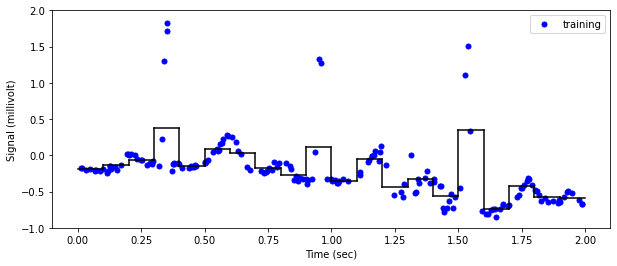

In [ ]:
# Regressogram => plot training data points
training_x = training_set[:, 0]
training_y = training_set[:, 1]
plt.figure(figsize = (10, 4))
plt.plot(training_x, training_y, "b.", markersize = 10, label = 'training')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()

# plot regressogram for bin_width = 0.1
bin_width_regressogram = 0.1
left_borders = np.arange(min_value_x, max_value_x, bin_width_regressogram)
right_borders = np.arange(min_value_x + bin_width_regressogram, max_value_x + bin_width_regressogram, bin_width_regressogram)
regressogram_values_training = np.zeros(len(left_borders)).tolist()
border_counts_training = [np.sum((left_borders[b] < training_x) & (training_x <= right_borders[b])) for b in range(len(left_borders))]
total_data_training_sorted = training_set[training_set[:, 0].argsort()]
columnLocation = 0;

for i in range(len(left_borders)):
  for n in range(border_counts_training[i]):
    regressogram_values_training[i] += total_data_training_sorted[columnLocation + n][1]
  regressogram_values_training[i] /= border_counts_training[i]
  columnLocation += border_counts_training[i]

for b in range(len(left_borders)):
  plt.plot([left_borders[b], right_borders[b]], [regressogram_values_training[b], regressogram_values_training[b]], color = 'black')
for b in range(len(left_borders) - 1):
  plt.plot([right_borders[b], right_borders[b]], [regressogram_values_training[b], regressogram_values_training[b + 1]], "k-")
  
plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

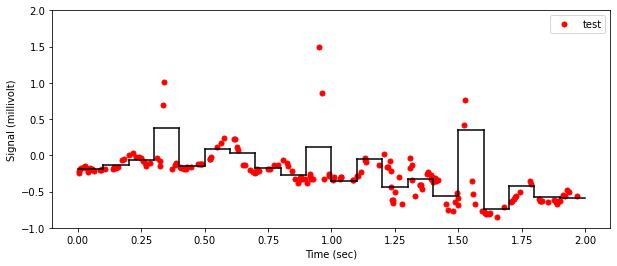

In [ ]:
# Regressogram => plot testing data points
testing_x = test_set[:, 0]
testing_y = test_set[:, 1]
plt.figure(figsize = (10, 4))
plt.plot(testing_x, testing_y, "r.", markersize = 10, label = 'test')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()

# plot regressogram for bin_width = 0.1
for b in range(len(left_borders)):
  plt.plot([left_borders[b], right_borders[b]], [regressogram_values_training[b], regressogram_values_training[b]], color = 'black')
for b in range(len(left_borders) - 1):
  plt.plot([right_borders[b], right_borders[b]], [regressogram_values_training[b], regressogram_values_training[b + 1]], "k-")

plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
total_data_training_sorted = training_set[training_set[:, 0].argsort()]
plt.show()

In [ ]:
# RMSE for the regressogram
total_data_testing_sorted = test_set[test_set[:, 0].argsort()]
border_counts_testing = [np.sum((left_borders[b] < testing_x) & (testing_x <= right_borders[b])) for b in range(len(left_borders))]

sum_error = 0
columnLocation = 0
for i in range(len(regressogram_values_training)):
  for n in range(border_counts_testing[i]):
    sum_error += (total_data_testing_sorted[columnLocation + n][1] - regressogram_values_training[i])**2
  columnLocation += border_counts_testing[i]

rmse_regressogram = math.sqrt(sum_error / len(total_data_testing_sorted[:, 0]))
print("Regressogram => RMSE is " + str(rmse_regressogram) + " when h is " + str(bin_width_regressogram))

Regressogram => RMSE is 0.25574685884774784 when h is 0.1


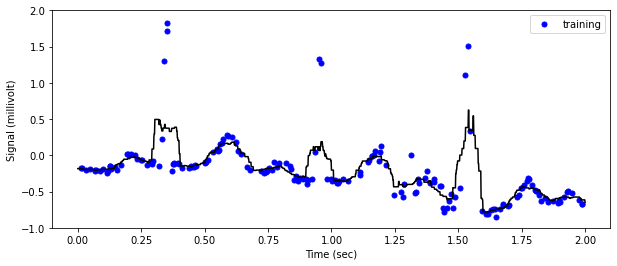

In [ ]:
# Running Mean Smoother => plot training data points
bin_width_running_mean_smoother = 0.1
data_interval = np.linspace(min_value_x, max_value_x, 1601)
g_rms = []

for x in data_interval:
  value = 0
  count = 0
  for xi in range(len(training_set[:, 0])):
    if abs(((x - training_set[xi][0]) / bin_width_running_mean_smoother)) <= 0.5:
      value += training_set[xi][1]
      count += 1
  value /= count
  g_rms.append(value)

plt.figure(figsize = (10, 4))
plt.plot(training_x, training_y, "b.", markersize = 10, label = 'training')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()
plt.plot(data_interval, g_rms, "k-")
plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

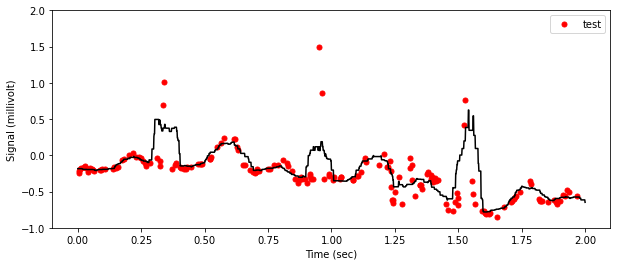

In [ ]:
# Running Mean Smoother => plot testing data points
plt.figure(figsize = (10, 4))
plt.plot(testing_x, testing_y, "r.", markersize = 10, label = 'test')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()
plt.plot(data_interval, g_rms, "k-")
plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

In [ ]:
# RMSE for Running Mean Smoother
sum = 0
for xi in range(len(test_set[:, 0])):
  x_value = test_set[xi][0]
  y_actual = test_set[xi][1]
  y_predicted = 0
  value = 0
  count = 0
  for xi2 in range(len(test_set[:, 0])):
    xi2_value = training_set[xi2][0]
    if abs(((x_value - xi2_value) / bin_width_running_mean_smoother)) <= 0.5:
      value += training_set[xi2][1]
      count += 1
  value /= count
  y_predicted = value
  squared_error = (y_actual - y_predicted)**2
  sum += squared_error

rmse_rms = math.sqrt(sum / len(test_set[:, 0]))
print("Running Mean Smoother => RMSE is " + str(rmse_rms) + " when h is " + str(bin_width_running_mean_smoother))

Running Mean Smoother => RMSE is 0.24334170557116422 when h is 0.1


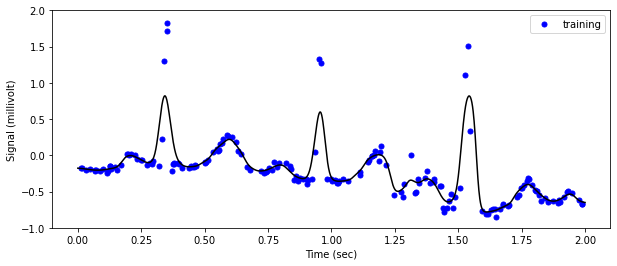

In [ ]:
# Kernel Smoother => plot training data points
bin_width_kernel = 0.02
data_interval = np.linspace(min_value_x, max_value_x, 1601)
g_kernel = []

for x in data_interval:
  value = 0
  count = 0
  for xi in range(len(training_set[:, 0])):
    inner_value = (x - training_set[xi][0]) / bin_width_kernel
    kernel_value = (1 / math.sqrt(2 * math.pi)) * math.exp(-1 * ((inner_value**2) / 2))
    value += kernel_value * training_set[xi][1]
    count += kernel_value
  value /= count
  g_kernel.append(value)

plt.figure(figsize = (10, 4))
plt.plot(training_x, training_y, "b.", markersize = 10, label = 'training')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()
plt.plot(data_interval, g_kernel, "k-")
plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

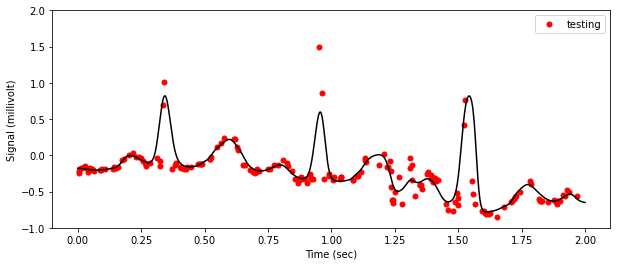

In [ ]:
# Kernel Smoother => plot testing data points
plt.figure(figsize = (10, 4))
plt.plot(testing_x, testing_y, "r.", markersize = 10, label = 'testing')
plt.ylabel('Signal (millivolt)')
plt.xlabel('Time (sec)')
plt.legend()
plt.plot(data_interval, g_kernel, "k-")
plt.xticks(x_axis_values)
plt.yticks(y_axis_values)
plt.show()

In [ ]:
# RMSE for Kernel Smoother
sum = 0
for xi in range(len(test_set[:, 0])):
  x_value = test_set[xi][0]
  y_actual = test_set[xi][1]
  y_predicted = 0
  value = 0
  count = 0
  for xi2 in range(len(test_set[:, 0])):
    inner_value = (x_value - training_set[xi2][0]) / bin_width_kernel
    kernel_value = (1 / math.sqrt(2 * math.pi)) * math.exp(-1 * ((inner_value**2) / 2))
    value += kernel_value * training_set[xi2][1]
    count += kernel_value
  value /= count
  y_predicted = value
  squared_error = (y_actual - y_predicted)**2
  sum += squared_error

rmse_kernel = math.sqrt(sum / len(test_set[:, 0]))
print("Kernel Smoother => RMSE is " + str(rmse_kernel) + " when h is " + str(bin_width_kernel))

Kernel Smoother => RMSE is 0.19807741439132479 when h is 0.02
